In [2]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
import peaks_utility as psu

Start import
Working on midway2-0417.rcc.local with the following versions 
and installation paths:
strax
	v0.12.2	/dali/lgrandi/strax/strax/strax
straxen
	v0.11.0	/dali/lgrandi/strax/straxen/straxen



In [3]:
st = straxen.contexts.xenonnt_online()

In [3]:
st.set_context_config({'check_available': ('raw_records', 'records', 'peaklets', 'peak_basics')})
st.select_runs()

Checking data availability: 100%|██████████| 4/4 [00:50<00:00, 12.67s/it]


,name,number,mode,start,end,tags,livetime,records_available,peak_basics_available,peaklets_available,raw_records_available
0,009505,9505,tpc_selftrigger_commissioning_highthresh,2020-10-21 05:43:26.347,2020-10-21 05:46:38.597,,00:03:12.250000,True,True,True,False
1,009504,9504,tpc_selftrigger_commissioning_highthresh,2020-10-21 04:43:04.531,2020-10-21 05:43:06.257,,01:00:01.726000,True,True,True,False
2,009503,9503,tpc_selftrigger_commissioning_highthresh,2020-10-21 03:42:44.791,2020-10-21 04:42:47.452,,01:00:02.661000,True,True,True,False
3,009502,9502,tpc_selftrigger_commissioning_highthresh,2020-10-21 02:42:22.032,2020-10-21 03:42:24.707,,01:00:02.675000,True,True,True,False
4,009501,9501,tpc_selftrigger_commissioning_highthresh,2020-10-21 01:41:57.237,2020-10-21 02:41:58.945,bad,01:00:01.708000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
229,009276,9276,tpc_selftrigger_commissioning,2020-10-07 12:38:18.278,2020-10-07 12:38:53.320,,00:00:35.042000,True,False,False,False
230,009275,9275,tpc_selftrigger_commissioning,2020-10-07 12:33:23.865,2020-10-07 12:34:02.911,messy,00:00:39.046000,True,False,False,False
231,009274,9274,tpc_selftrigger_commissioning,2020-10-07 12:31:07.650,2020-10-07 12:31:39.688,,00:00:32.038000,False,False,False,False
232,009273,9273,tpc_noise,2020-10-07 12:29:54.507,2020-10-07 12:30:44.564,,00:00:50.057000,False,False,False,False


In [12]:
runs = st.select_runs(available = 'peaklets', exclude_tags = ('bad', 'messy'))

In [25]:
runs

,name,number,mode,start,end,tags,livetime,records_available,peak_basics_available,peaklets_available,raw_records_available
0,009505,9505,tpc_selftrigger_commissioning_highthresh,2020-10-21 05:43:26.347,2020-10-21 05:46:38.597,,00:03:12.250000,True,True,True,False
1,009504,9504,tpc_selftrigger_commissioning_highthresh,2020-10-21 04:43:04.531,2020-10-21 05:43:06.257,,01:00:01.726000,True,True,True,False
2,009503,9503,tpc_selftrigger_commissioning_highthresh,2020-10-21 03:42:44.791,2020-10-21 04:42:47.452,,01:00:02.661000,True,True,True,False
3,009502,9502,tpc_selftrigger_commissioning_highthresh,2020-10-21 02:42:22.032,2020-10-21 03:42:24.707,,01:00:02.675000,True,True,True,False
5,009500,9500,tpc_selftrigger_commissioning_highthresh,2020-10-21 00:41:34.505,2020-10-21 01:41:36.158,,01:00:01.653000,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
133,009372,9372,tpc_selftrigger_commissioning_veto_trg,2020-10-15 19:57:24.034,2020-10-15 20:57:26.101,,01:00:02.067000,True,True,True,False
134,009371,9371,tpc_selftrigger_commissioning_veto_trg,2020-10-15 18:56:58.927,2020-10-15 19:57:00.952,,01:00:02.025000,True,True,True,False
135,009370,9370,tpc_selftrigger_commissioning_veto_trg,2020-10-15 17:56:39.786,2020-10-15 18:56:41.845,,01:00:02.059000,True,True,True,False
136,009369,9369,tpc_selftrigger_commissioning_veto_trg,2020-10-15 16:16:43.564,2020-10-15 16:26:47.223,,00:10:03.659000,True,True,True,True


In [17]:
run_id = '009375'

In [18]:
st.is_stored(run_id, "peak_basics")

True

In [19]:
peaks = st.get_array(run_id, targets = ('peak_basics'), seconds_range = (0, 10),
                     progress_bar=False)

In [20]:
print(f'Loaded {peaks.nbytes/1e6:.1f} MB of peaks-data')

Loaded 1.3 MB of peaks-data


In [9]:
def select_data(st, run_id):
    area = []
    width = []
    rise_time = []
    max_pmt_area = []
    area_top = []
    r_data = pd.DataFrame(columns=['area','range_50p_area','rise_time',
                                   'max_pmt_area','area_fraction_top'])
    
    for chunk in st.get_iter(run_id, ['peak_basics'], max_workers=20,
                         keep_columns = ('area', 'range_50p_area','rise_time',
                                         'max_pmt_area','area_fraction_top') ):
        area = np.append(area,chunk.data['area'])
        width = np.append(width,chunk.data['range_50p_area'])
        rise_time = np.append(rise_time,chunk.data['rise_time'])
        max_pmt_area = np.append(max_pmt_area,chunk.data['max_pmt_area'])
        area_top = np.append(area_top,chunk.data['area_fraction_top'])
    
    """"""
    r_data['area'] = area
    r_data['range_50p_area'] = width
    r_data['rise_time'] = rise_time
    r_data['max_pmt_area'] = max_pmt_area
    r_data['area_fraction_top'] = area_top
    """"""
    return r_data

In [21]:
data = select_data(st,run_id)

In [26]:
def plot_some_peaks(peaks, max_plots = 5, randomize = False):
    """Plot the first peaks in the peaks collection (max number of 5 by default)"""
    if randomize:
        # This randomly takes max_plots in the range (0, len(peaks)). Plot these indices
        indices = np.random.randint(0, len(peaks), max_plots)
    else:
        # Just take the first max_plots peaks in the data
        indices = range(max_plots)
    for i in indices:
        p = peaks[i]
        start, stop = p['time'], p['endtime']
        st.plot_peaks(run_id,
                      time_range = (start, stop))
        plt.title(f'S{p["type"]} of ~{int(p["area"])} PE (width {int(p["range_50p_area"])} ns)\n'
                  f'detected by {p["n_channels"]} PMTs at:\n'
                  f'{datetime.datetime.fromtimestamp(start/1e9).isoformat()}')  # should in s not ns hence /1e9
        plt.show()

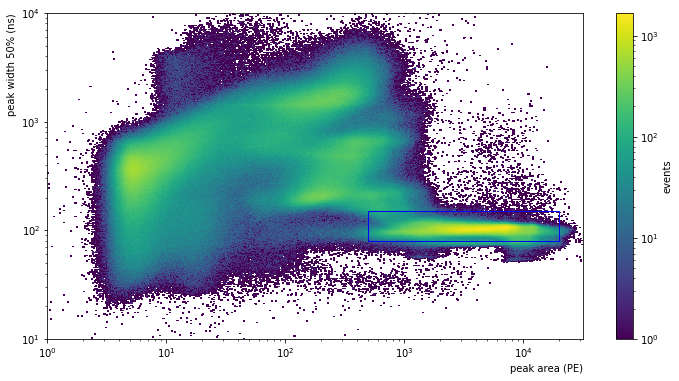

In [31]:
psu.plot_area_width(data,0,4.5,1,4)
psu.rectangle((5e2,2e4),(80,150),'b')

In [32]:
selected_peaks = peaks[(peaks['area']>5e2) & (peaks['area']<2e4) &
                       (peaks['range_50p_area']>80) & (peaks['range_50p_area']<150)]

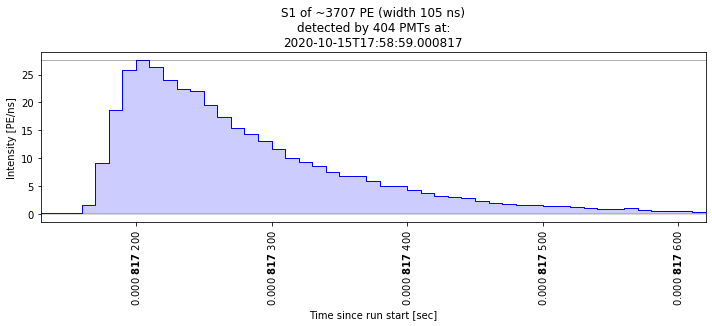

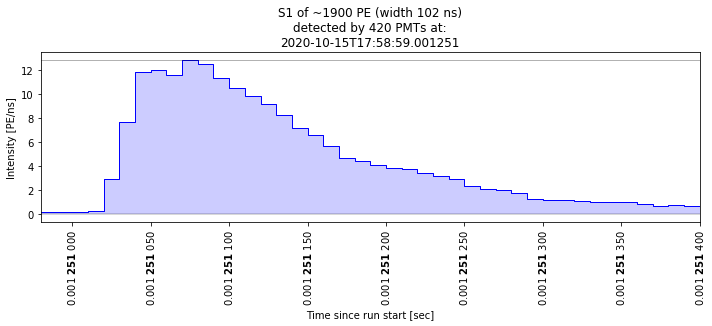

In [33]:
plot_some_peaks(selected_peaks, max_plots = 2)

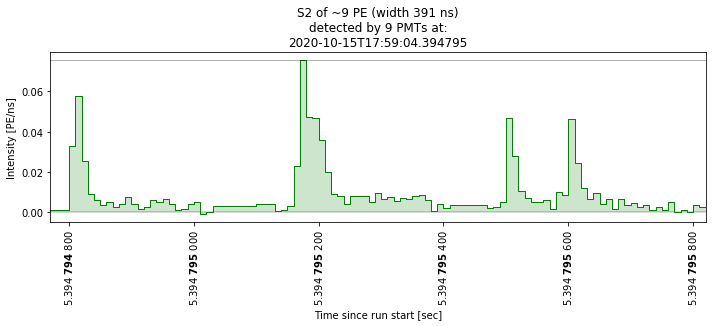

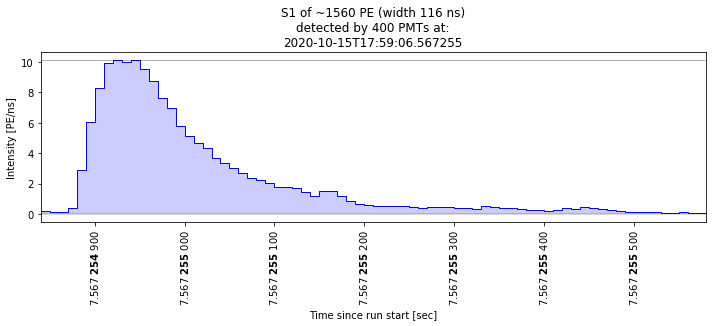

In [22]:
plot_some_peaks(peaks, max_plots = 2, randomize = 1)